# The breakdown of trust

In [1]:
%matplotlib inline

from __future__ import division
from __future__ import unicode_literals

import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import seaborn as sns
from society.agents import AllD
from society.agents import ConvenientlyUpsetParanoidComplex as CUPC

from society.worlds import LocalObsGridW, NetWorld, LocalObsNetW, GridWorld
from society.functions import is_corrupted, p_stars, plot_network, paranoia_eq_prior
from percolation import build_network

import pandas as pd
from IPython.display import display 
import random
import networkx as nx
import pickle
from glob import glob
import seaborn as sns

payoff = pd.DataFrame({'C': {'C': 1, 'D': 1.1}, 'D': {'C': 0., 'D': 0.1}})
justice = 0.3

## Local Observation Grid
### Complex vs ComplexUpset vs ComplexUpsetConvenientlyUpset
Como reacciona una sociedad de estos agentes frente a la invasión de un AllD
## Resultado
En una grilla los tres agentes resisten el embate de un AllD

GridWorld


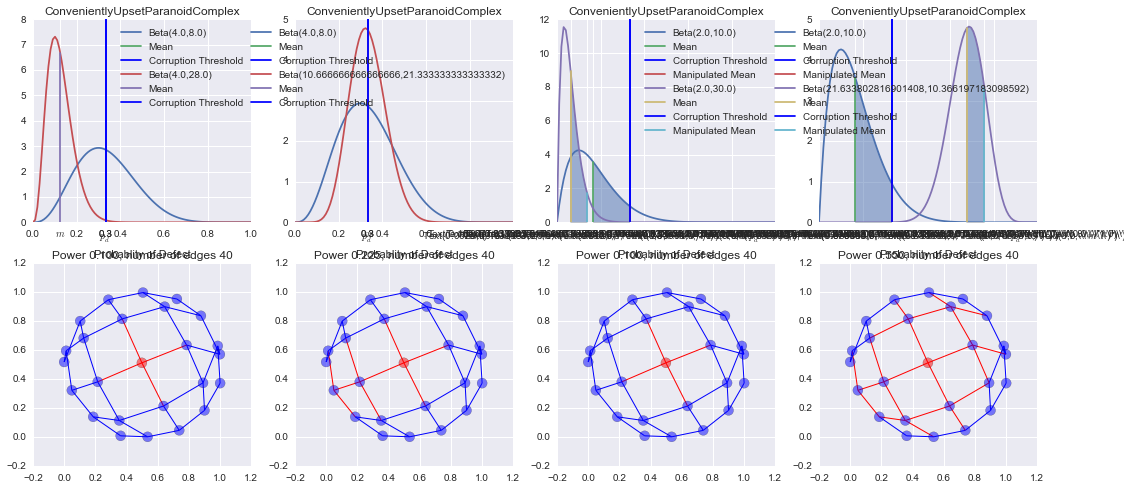

LocalObsGridW


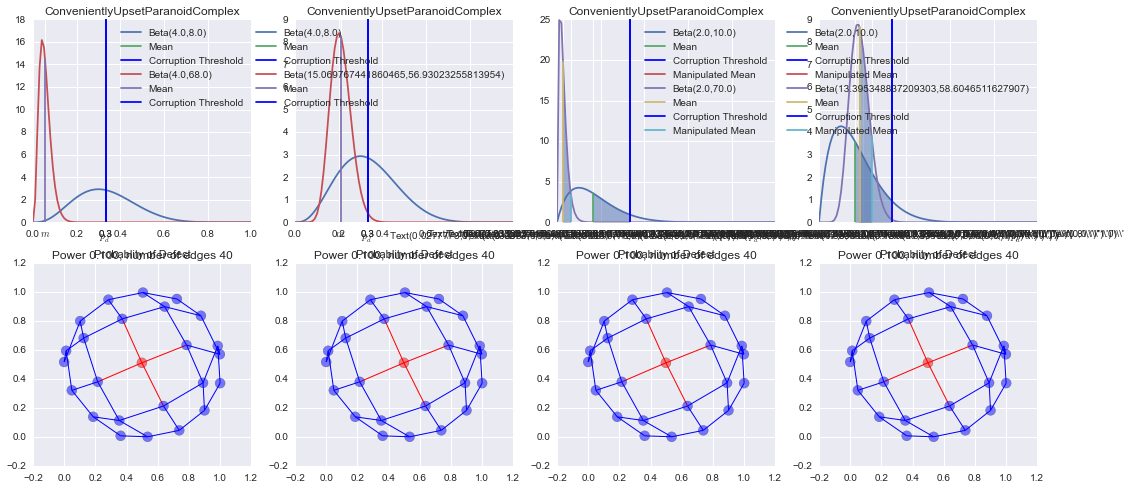

In [2]:
plt.close('all')
seed = 3#np.random.randint(0, 10000)
pltseed = 10
(src, dst) = (11, 10)
tf = 20
priors = [(8, 4), (8, 4), (10, 2), (10, 2)]
cog_diss = [0, 1, 0, 1]
for World in (GridWorld, LocalObsGridW):
    fig1, (axs_up, axs_down) = plt.subplots(2,4, figsize=[18, 8])
    print(World.__name__)
    for ax_up, ax_down, prior, cog_dis in zip(axs_up, axs_down, priors, cog_diss):
        paranoia_th = paranoia_eq_prior(prior, priors[0])
        np.random.seed(seed)
        w = World(5,5, payoff.get_values())
        kwargs = {'paranoia': paranoia_th, 'prior_params': prior, 'justice': 0.3, 'cog_dis': cog_dis}
        w.add_agents(CUPC, 12, **kwargs); w.add_agents(AllD, 1); w.add_agents(CUPC, 12, **kwargs)

        w.agents[src].plot_prior(w.agents[dst], ax=ax_up)#, label='initial state'
        w.evolve(tf)
        w.agents[src].plot_prior(w.agents[dst], ax=ax_up)#, label='final state'

        np.random.seed(pltseed)
        plot_network(w, ax=ax_down, pos=nx.spring_layout(w.network), kwnodes={'node_size': 100, 'alpha': 0.5})
        ax_up.legend()
        ax_up.set_title(w.agents[0].__class__.__name__)
        power = sum([is_corrupted(edge) for edge in w.network.edges()])
        power = power / w.network.number_of_edges()
        ax_down.set_title('Power {:.3f}, number of edges {}'.format(power, w.network.number_of_edges()))
    plt.show()

## Power Law

NetWorld


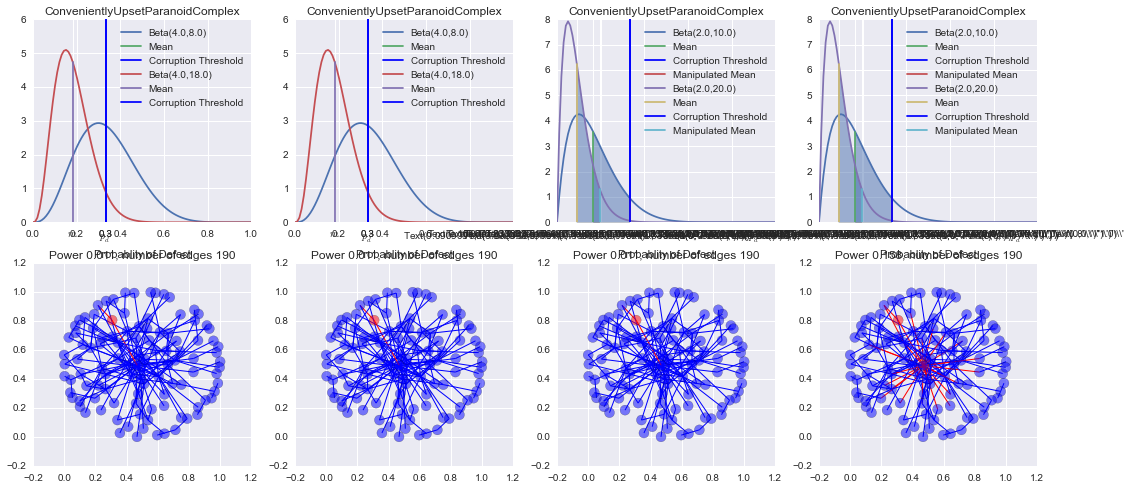

LocalObsNetW


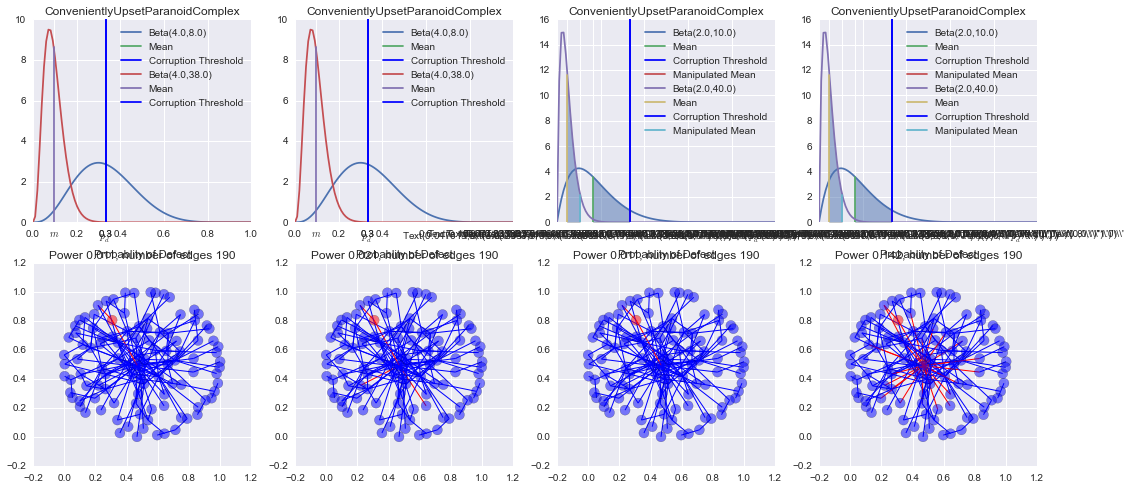

In [3]:
plt.close('all')
seed = 10 #np.random.randint(0, )
pltseed = 10

sw = build_network('powerlaw', seed, 2)
(src, dst) = sw.edges(11)[0]
tf = 10
priors = [(8, 4), (8, 4), (10, 2), (10, 2)]
cog_diss = [0, 1, 0, 1]
for World in (NetWorld, LocalObsNetW):
    fig1, (axs_up, axs_down) = plt.subplots(2,4, figsize=[18, 8])
    print(World(0,0).__class__.__name__)
    for ax_up, ax_down, prior, cog_dis in zip(axs_up, axs_down, priors, cog_diss):
        paranoia_th = paranoia_eq_prior(prior, priors[0])
        np.random.seed(seed)
        w = World(sw, payoff.get_values())
        kwargs = {'paranoia': paranoia_th, 'prior_params': prior, 'justice': 0.3, 'cog_dis': cog_dis}
        w.add_agents(CUPC, 49, **kwargs); w.add_agents(AllD, 1); w.add_agents(CUPC, len(sw)-50, **kwargs)

        w.agents[src].plot_prior(w.agents[dst], ax=ax_up)#, label='initial state'
        w.evolve(tf)
        w.agents[src].plot_prior(w.agents[dst], ax=ax_up)#, label='final state'

        np.random.seed(pltseed)
        plot_network(w, ax=ax_down, pos=nx.spring_layout(w.network), kwnodes={'node_size': 100, 'alpha': 0.5})
        ax_up.legend()
        ax_up.set_title(w.agents[0].__class__.__name__)
        power = sum([is_corrupted(edge) for edge in w.network.edges()])
        power = power / w.network.number_of_edges()
        ax_down.set_title('Power {:.3f}, number of edges {}'.format(power, w.network.number_of_edges()))
    plt.show()

# Exponential

NetWorld


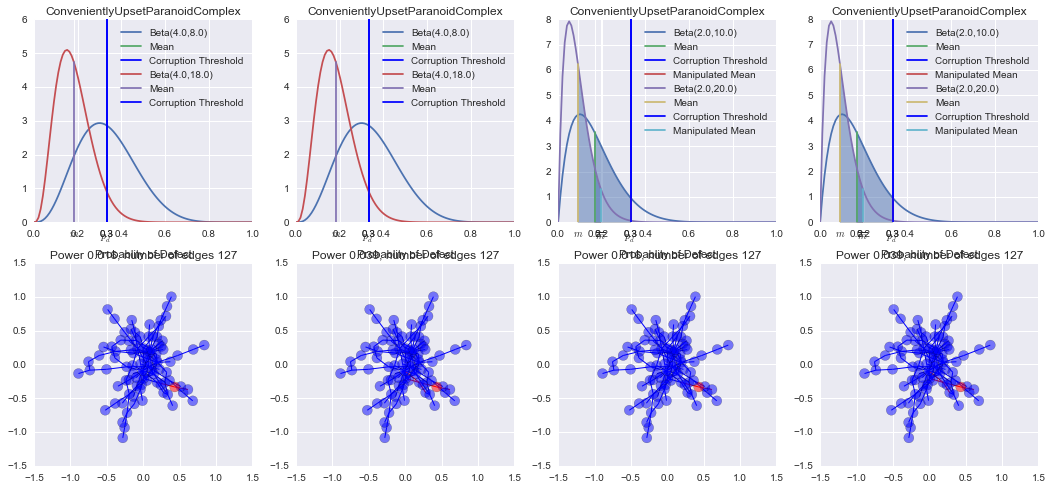

LocalObsNetW


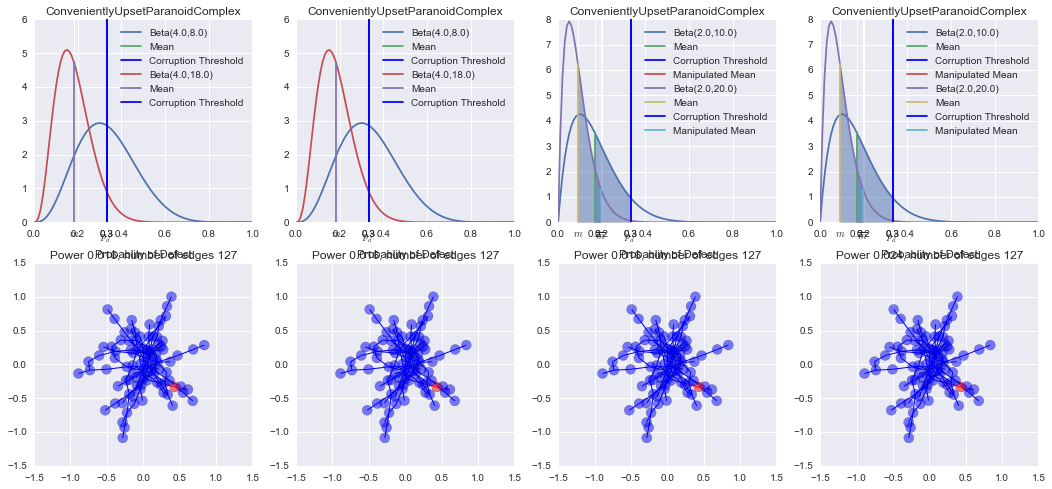

In [4]:
plt.close('all')
seed = 1003 #np.random.randint(0, )
pltseed = 10

sw = build_network('exponential', seed, 2)
(src, dst) = sw.edges(11)[0]
tf = 10
priors = [(8, 4), (8, 4), (10, 2), (10, 2)]
cog_diss = [0, 1, 0,1]
for World in (NetWorld, LocalObsNetW):
    fig1, (axs_up, axs_down) = plt.subplots(2,4, figsize=[18, 8])
    print(World(0,0).__class__.__name__)
    for ax_up, ax_down, prior, cog_dis in zip(axs_up, axs_down, priors, cog_diss):
        paranoia_th = paranoia_eq_prior(prior, priors[0])
        np.random.seed(seed)
        w = World(sw, payoff.get_values())
        kwargs = {'paranoia': paranoia_th, 'prior_params': prior, 'justice': 0.3, 'cog_dis': cog_dis}
        w.add_agents(CUPC, 49, **kwargs); w.add_agents(AllD, 1); w.add_agents(CUPC, len(sw)-50, **kwargs)

        w.agents[src].plot_prior(w.agents[dst], ax=ax_up) #, label='initial state'
        w.evolve(tf)
        w.agents[src].plot_prior(w.agents[dst], ax=ax_up) #, label='final state'

        np.random.seed(pltseed)
        plot_network(w, ax=ax_down, pos=nx.spring_layout(w.network), kwnodes={'node_size': 100, 'alpha': 0.5})
        ax_up.legend()
        ax_up.set_title(w.agents[0].__class__.__name__)
        power = sum([is_corrupted(edge) for edge in w.network.edges()])
        power = power / w.network.number_of_edges()
        ax_down.set_title('Power {:.3f}, number of edges {}'.format(power, w.network.number_of_edges()))
    plt.show()

# Random

11
NetWorld


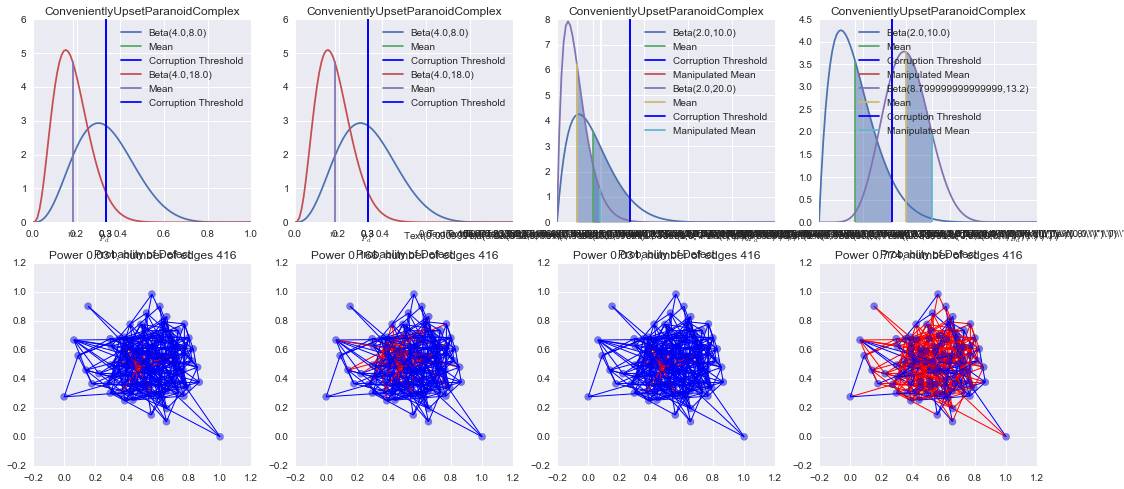

LocalObsNetW


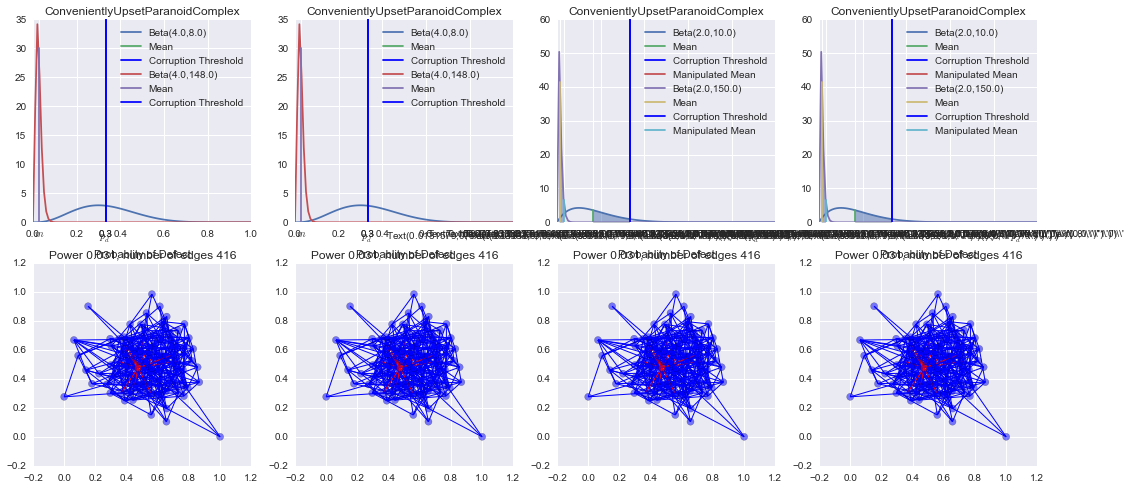

In [4]:
plt.close('all')
seed = np.random.randint(0, 1000000)
seed = 11
print(seed)
pltseed = 10

sw = build_network('random', seed, 8)
(src, dst) = sw.edges(11)[0]
tf = 10
priors = [(8, 4), (8, 4), (10, 2), (10, 2)]
cog_diss = [0, 1, 0, 1]
for World in (NetWorld, LocalObsNetW):
    fig1, (axs_up, axs_down) = plt.subplots(2,4, figsize=[18, 8])
    print(World(0,0).__class__.__name__)
    for ax_up, ax_down, prior, cog_dis in zip(axs_up, axs_down, priors, cog_diss):
        paranoia_th = paranoia_eq_prior(prior, priors[0])
        np.random.seed(seed)
        w = World(sw, payoff.get_values())
        kwargs = {'paranoia': paranoia_th, 'prior_params': prior, 'justice': 0.3, 'cog_dis': cog_dis}
        w.add_agents(CUPC, 49, **kwargs); w.add_agents(AllD, 1); w.add_agents(CUPC, len(sw)-50, **kwargs)

        w.agents[src].plot_prior(w.agents[dst], ax=ax_up)#, label='initial state'
        w.evolve(tf)
        w.agents[src].plot_prior(w.agents[dst], ax=ax_up)#, label='final state'

        np.random.seed(pltseed)
        plot_network(w, ax=ax_down, pos=nx.spring_layout(w.network), kwnodes={'node_size': 50, 'alpha': 0.5})
        ax_up.legend()
        ax_up.set_title(w.agents[0].__class__.__name__)
        power = sum([is_corrupted(edge) for edge in w.network.edges()])
        power = power / w.network.number_of_edges()
        ax_down.set_title('Power {:.3f}, number of edges {}'.format(power, w.network.number_of_edges()))
    plt.show()